In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

c:\Users\user\OneDrive\Desktop\coding\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 292k/292k [00:01<00:00, 277kB/s]

Extracting files...
Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\nehalbirla\vehicle-dataset-from-cardekho\versions\4


In [3]:
import os 
file_path = os.path.join(path, 'car data.csv')
car_data = pd.read_csv(file_path)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.shape

(301, 9)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label = LabelEncoder()
car_data['Fuel_Type'] = label.fit_transform(car_data['Fuel_Type'])
car_data['Seller_Type'] = label.fit_transform(car_data['Seller_Type'])
car_data['Transmission'] = label.fit_transform(car_data['Transmission'])
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [12]:
X = car_data.drop(columns= ['Car_Name', 'Selling_Price'], axis = 1)
Y = car_data['Selling_Price']
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, random_state=2)

**LINEAR REGRESSION**

In [15]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
train_data_prediction = lin_reg_model.predict(X_train)

In [17]:
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8799451660493703


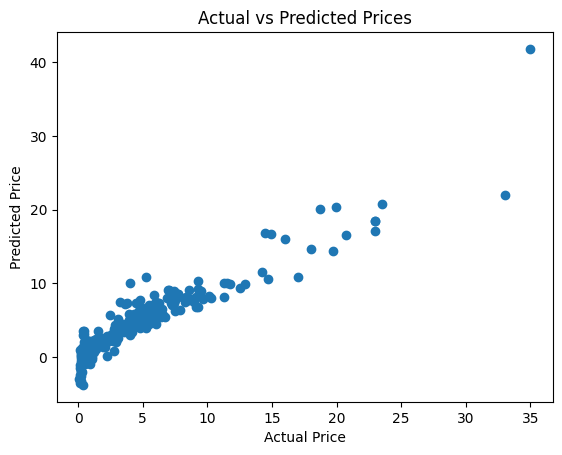

In [18]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [19]:
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8365766715026416


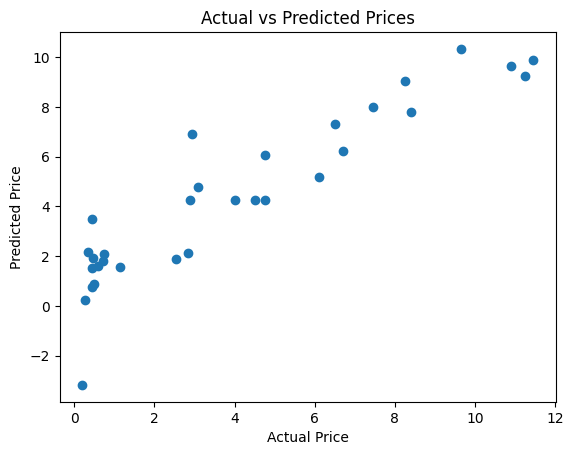

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

**LASSO REGRESSION**

In [22]:
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [23]:
train_data_prediction = lasso_reg_model.predict(X_train)

In [24]:
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8427856123435794


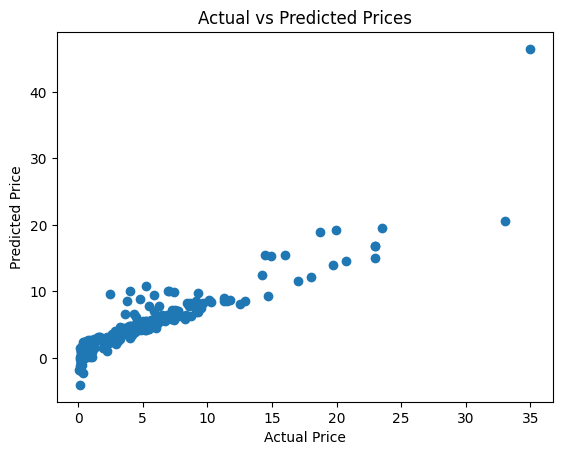

In [25]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [26]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [27]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173195


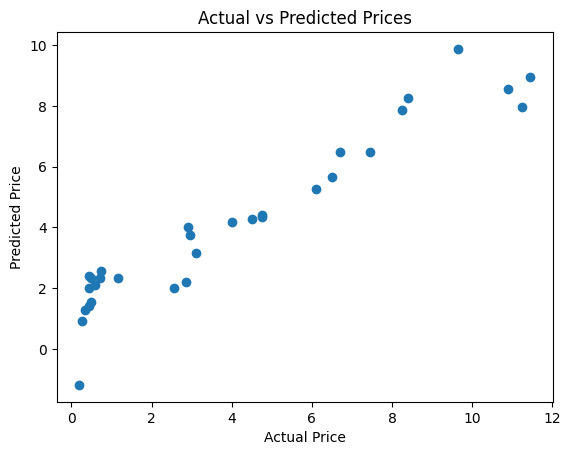

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()